In [42]:
import numpy as np
import tensorflow as tf
import math
import pandas as pd
import logging
logging.basicConfig(level=logging.DEBUG) 
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import KFold
warnings.filterwarnings("ignore")

In [43]:
path='/Users/peijialong/Desktop/ANN/auto-mpg.txt'
columnNames = ["MPG","Cylinders","Displacement","Horsepower","Weight","Accleration","Model Year","Origin"]
data =pd.read_csv(path, names=columnNames, na_values="?",comment="\t",sep=" ",skipinitialspace=True)

In [44]:
data = data.dropna()

In [45]:
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)

In [46]:
valid_data= train_data.sample(frac=0.1, random_state=0)
train_data= train_data.drop(valid_data.index)

In [47]:
train_labels = train_data.pop('MPG')
valid_labels = valid_data.pop('MPG')
test_labels = test_data.pop('MPG')

In [48]:
trainStats = train_data.describe()
trainStats = trainStats.transpose()

In [49]:
def Norm(x):
    return (x-trainStats["mean"])/trainStats["std"]
 
TrainData = Norm(train_data)
ValidData =  Norm(valid_data)
TestData = Norm(test_data)

In [50]:
TrainData.shape

(283, 7)

In [51]:
train_labels=pd.DataFrame(train_labels)
valid_labels = pd.DataFrame(valid_labels)
test_labels =pd.DataFrame(test_labels)

In [52]:
import tensorflow.compat.v1 as tf

tf.disable_v2_behavior()

In [53]:
#Network parameters
n_hidden1 =11
n_hidden2 =15
n_hidden3 = 10
n_input = 7
n_output = 1
#Learning parameters
learning_constant = 0.02
number_epochs = 500

In [54]:
#Defining the input and the output
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_output])
#DEFINING WEIGHTS AND BIASES
#Biases first hidden layer
b1 = tf.Variable(tf.random_normal([n_hidden1]))
#Biases second hidden layer
b2 = tf.Variable(tf.random_normal([n_hidden2]))
#Biases third hidden layer
b3 = tf.Variable(tf.random_normal([n_hidden3]))
#Biases output layer
b4 = tf.Variable(tf.random_normal([n_output]))
#Weights connecting input layer with first hidden layer
w1 = tf.Variable(tf.random_normal([n_input, n_hidden1]))
#Weights connecting first hidden layer with second hidden layer
w2 = tf.Variable(tf.random_normal([n_hidden1, n_hidden2]))
#Weights connecting second hidden layer with output layer
w3 = tf.Variable(tf.random_normal([n_hidden2, n_hidden3]))
#Weights connecting second hidden layer with output layer
w4 = tf.Variable(tf.random_normal([n_hidden3, n_output]))

In [55]:
def multilayer_perceptron(input_d):
    #Task of neurons of first hidden layer
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(input_d, w1), b1))
    #Task of neurons of second hidden layer
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, w2), b2))
    #Task of neurons of third hidden layer
    layer_3 = tf.nn.sigmoid(tf.add(tf.matmul(layer_2, w3),b3))
    #Task of neurons of output layer
    out_layer = tf.add(tf.matmul(layer_3, w4),b4)
    return out_layer

In [56]:
#Create model
neural_network = multilayer_perceptron(X)

In [57]:
#Define loss and optimizer
loss_op = tf.reduce_mean(tf.math.squared_difference(neural_network,Y))
#loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=neural_network,labels=Y))
optimizer = tf.train.GradientDescentOptimizer(learning_constant).minimize(loss_op)

In [58]:
#Initializing the variables
init = tf.global_variables_initializer()

In [59]:
def plot_MSE(epoch,MSE):
    
    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Mean Square Error [MSE]")
    plt.plot(epoch,MSE,label="Train Error")
    plt.ylim([0,10])
    plt.legend()

    plt.show()

Epoch: 0
MSE for trainset: 348.43314
MSE for validset: 380.06186
Epoch: 50
MSE for trainset: 15.831882
MSE for validset: 19.93788
Epoch: 100
MSE for trainset: 9.009824
MSE for validset: 13.783087
Epoch: 150
MSE for trainset: 7.2839475
MSE for validset: 12.097245
Epoch: 200
MSE for trainset: 6.6666923
MSE for validset: 11.059305
Epoch: 250
MSE for trainset: 6.3376513
MSE for validset: 10.304431
Epoch: 300
MSE for trainset: 6.1252284
MSE for validset: 9.78121
Epoch: 350
MSE for trainset: 5.963989
MSE for validset: 9.38287
Epoch: 400
MSE for trainset: 5.830491
MSE for validset: 9.057659
Epoch: 450
MSE for trainset: 5.7151384
MSE for validset: 8.784475
MSE for testset: 7.888961


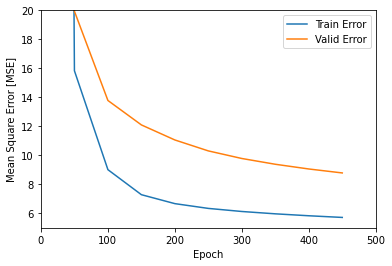

In [81]:
with tf.Session() as sess:
    sess.run(init)
    #Training epoch
    Epoch=[]
    MSEtol=[]
    MSEvaltol=[]
    for epoch in range(number_epochs):
        sess.run(optimizer, feed_dict={X: TrainData, Y:train_labels})
        if epoch % 50 == 0:
            pred = (neural_network)
            MSE=tf.reduce_mean(tf.keras.losses.MSE(pred,Y))
            #print(MSE.eval({X: TrainData, Y:train_labels}))
            Epoch.append(epoch)
            MSEtol.append(MSE.eval({X: TrainData, Y:train_labels}))
            MSEvaltol.append(MSE.eval({X: ValidData, Y:valid_labels}))
            print("Epoch:", '%d' % (epoch))
            print("MSE for trainset:", MSE.eval({X: TrainData, Y:train_labels}))
            print("MSE for validset:", MSE.eval({X: ValidData, Y:valid_labels}))
                    
    MSEtest = MSE.eval({X: TestData, Y:test_labels})
    print('MSE for testset:',MSEtest)
    plt.xlabel("Epoch")
    plt.ylabel("Mean Square Error [MSE]")
    plt.plot(Epoch,MSEtol,label="Train Error") 
    plt.plot(Epoch,MSEvaltol,label="Valid Error")
    plt.xlim(0,500)
    plt.ylim(5,20)
    plt.legend()
    #plot_MSE(Epoch,MSE.eval({X: TrainData, Y:train_labels}))
    #tf.keras.evaluate(pred,TrainData)
    #print("Prediction:", pred.eval({X: TrainData}))
    output=neural_network.eval({X: TrainData})

In [61]:
print("===============10-fold cross validation")
k=10
datax=TrainData
datay=train_labels
MSEtotal=0
for train_index,test_index in KFold(k,shuffle=True).split(datax):
    x_train, x_test=datax.iloc[train_index],datax.iloc[test_index]
    y_train, y_test=datay.iloc[train_index],datay.iloc[test_index]
    
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(number_epochs):
            sess.run(optimizer, feed_dict={X: x_train, Y: y_train})
            if epoch % 50 == 0 and epoch < 499 :
                pred = (neural_network)
                MSE=tf.reduce_mean(tf.keras.losses.MSE(pred,Y))
            elif epoch == 499:
                pred = (neural_network)
                MSE=tf.reduce_mean(tf.keras.losses.MSE(pred,Y))
                #print(" MSE: ", MSE.eval({X: TrainData, Y:train_labels}))
                MSEtotal += float(MSE.eval({X: TrainData, Y:train_labels}))
MSEtotal = MSEtotal/k
print(" MSEtotal: ", MSEtotal)

===============10-fold cross validation
 MSEtotal:  5.916813373565674


ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

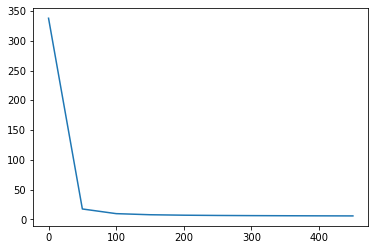

In [67]:
plt.plot(Epoch,MSEtol,label="Train Error")
plt.plot(Epoch,MSEval,label="Valid Error")

In [70]:
MSEtol

[337.89014,
 17.470741,
 9.630966,
 7.793264,
 7.0137815,
 6.579303,
 6.303251,
 6.1035357,
 5.942928,
 5.8054385]

In [71]:
MSEval

[]